In [1]:
import pandas as pd
data = pd.read_csv('/home/any1/Documents/I2_Data_Science/Final_Project/data/processed_v1_student_depression.csv')
print(data.describe())


                  id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Sleep Duration  \
count  27901.000000        27901.000000      27901.000000    27901.000000   
mean       7.656104            2.943837          0.000681        2.397405   
std        1.470707            1.361148          0.044394        1.127969   
min        0.000000            0.000000    

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


/home/any1/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])


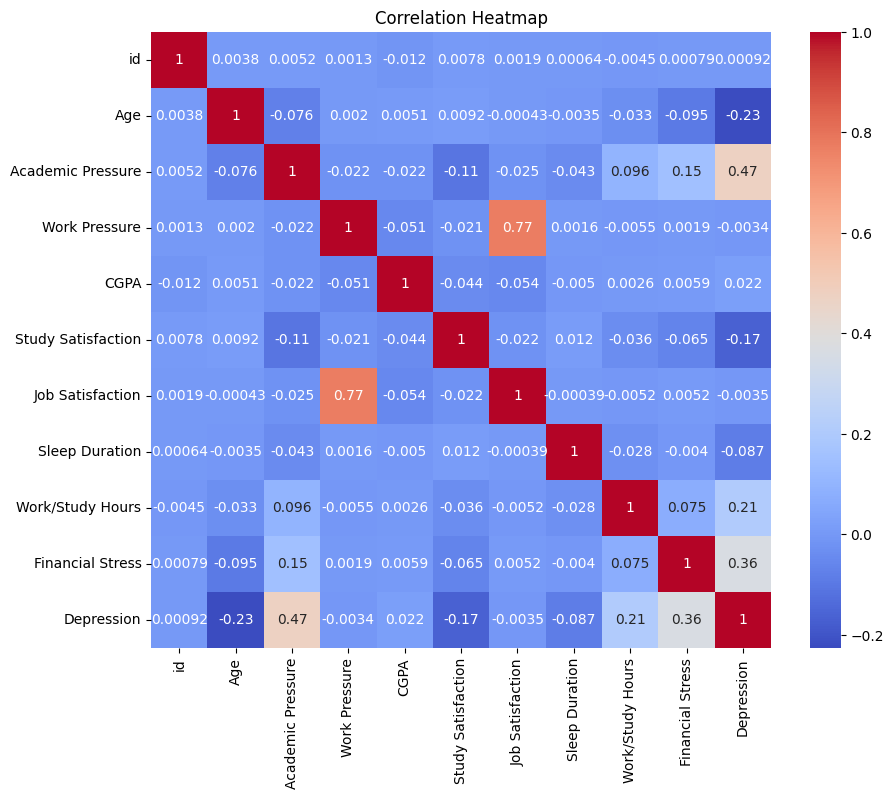

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


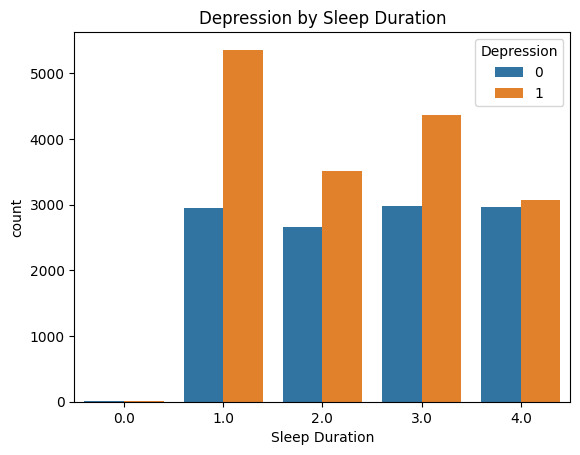

In [5]:
sns.countplot(x='Sleep Duration', hue='Depression', data=data)
plt.title("Depression by Sleep Duration")
plt.show()


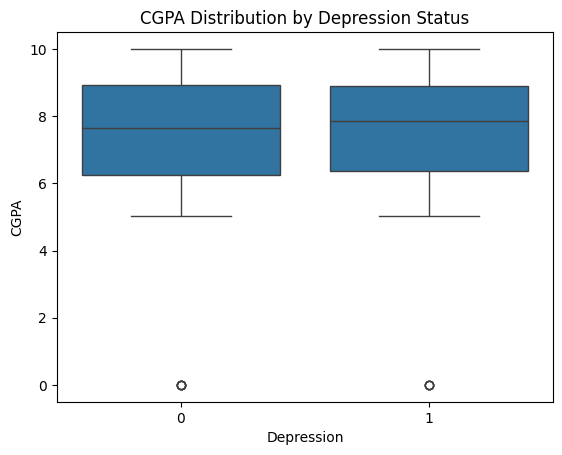

In [6]:
sns.boxplot(x='Depression', y='CGPA', data=data)
plt.title("CGPA Distribution by Depression Status")
plt.show()


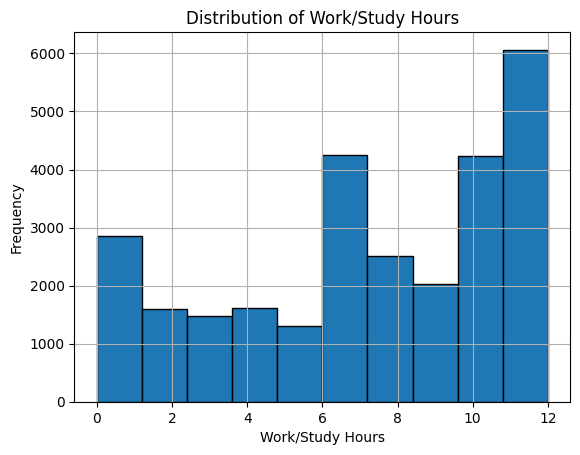

In [7]:
data['Work/Study Hours'].hist(bins=10, edgecolor='black')
plt.title("Distribution of Work/Study Hours")
plt.xlabel("Work/Study Hours")
plt.ylabel("Frequency")
plt.show()


In [8]:
data.to_csv('../data/processed_v2_eda_student_depression.csv', index=False)
